# SVM

### SUPPORT VECTOR CLASSIFIER

In [1]:
# liberaries
# for data manupulation 
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe

# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for model and data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
# read dataset
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/SVM/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# class is the target column and I need to classify the class of the mushroom segment on the basis of these features of mushrooms

# EDA

In [4]:
# descriptive statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,624.974000,375.091938,0.0,290.000000,607.000000,957.250000,1279.000000
stalk_height,2000.0,8.449118,3.697217,2.0,5.291009,8.318596,11.781272,15.095066
cap_diameter,2000.0,12.314345,7.048845,1.0,5.723521,12.124902,18.698605,25.000054


In [5]:
num_col = df.describe().columns.to_list()
num_col

['Unnamed: 0', 'stalk_height', 'cap_diameter']

In [6]:
# no missing values
# these columns are skewed and
# there is posibility of the outliers in the columns

In [7]:
# descriptive statistics for categorical columns
df.describe(include='object').T

,count,unique,top,freq
cap_shape,2000,5,sunken,439
cap_surface,2000,4,scaly,568
cap_color,2000,9,brown,263
bruises,2000,2,yes,1023
odor,2000,9,foul,274
gill_attachment,2000,4,free,540
gill_spacing,2000,3,distant,677
gill_size,2000,2,narrow,1007
gill_color,2000,12,orange,216
stalk_shape,2000,2,enlarging,1040


In [8]:
cat_col = df.describe(include='object').columns.to_list()
cat_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [9]:
# unique values in each categorical columns
for col in cat_col:
    print(f'{col} columns is having {df[col].nunique()} unique values')
    print(' ')
    print(df[col].unique())
    print('--'*30)

cap_shape columns is having 5 unique values
 
['sunken' 'flat' 'bell' 'convex' 'conical']
------------------------------------------------------------
cap_surface columns is having 4 unique values
 
['scaly' 'fibrous' 'grooves' 'smooth']
------------------------------------------------------------
cap_color columns is having 9 unique values
 
['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
------------------------------------------------------------
bruises columns is having 2 unique values
 
['no' 'yes']
------------------------------------------------------------
odor columns is having 9 unique values
 
['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
------------------------------------------------------------
gill_attachment columns is having 4 unique values
 
['descending' 'notched' 'free' 'attached']
------------------------------------------------------------
gill_spacing columns is having 3 unique values
 
['distant' 'crowded

In [10]:
# count of classes
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [11]:
# dataset is little bit imbalanced

<Axes: xlabel='class', ylabel='count'>

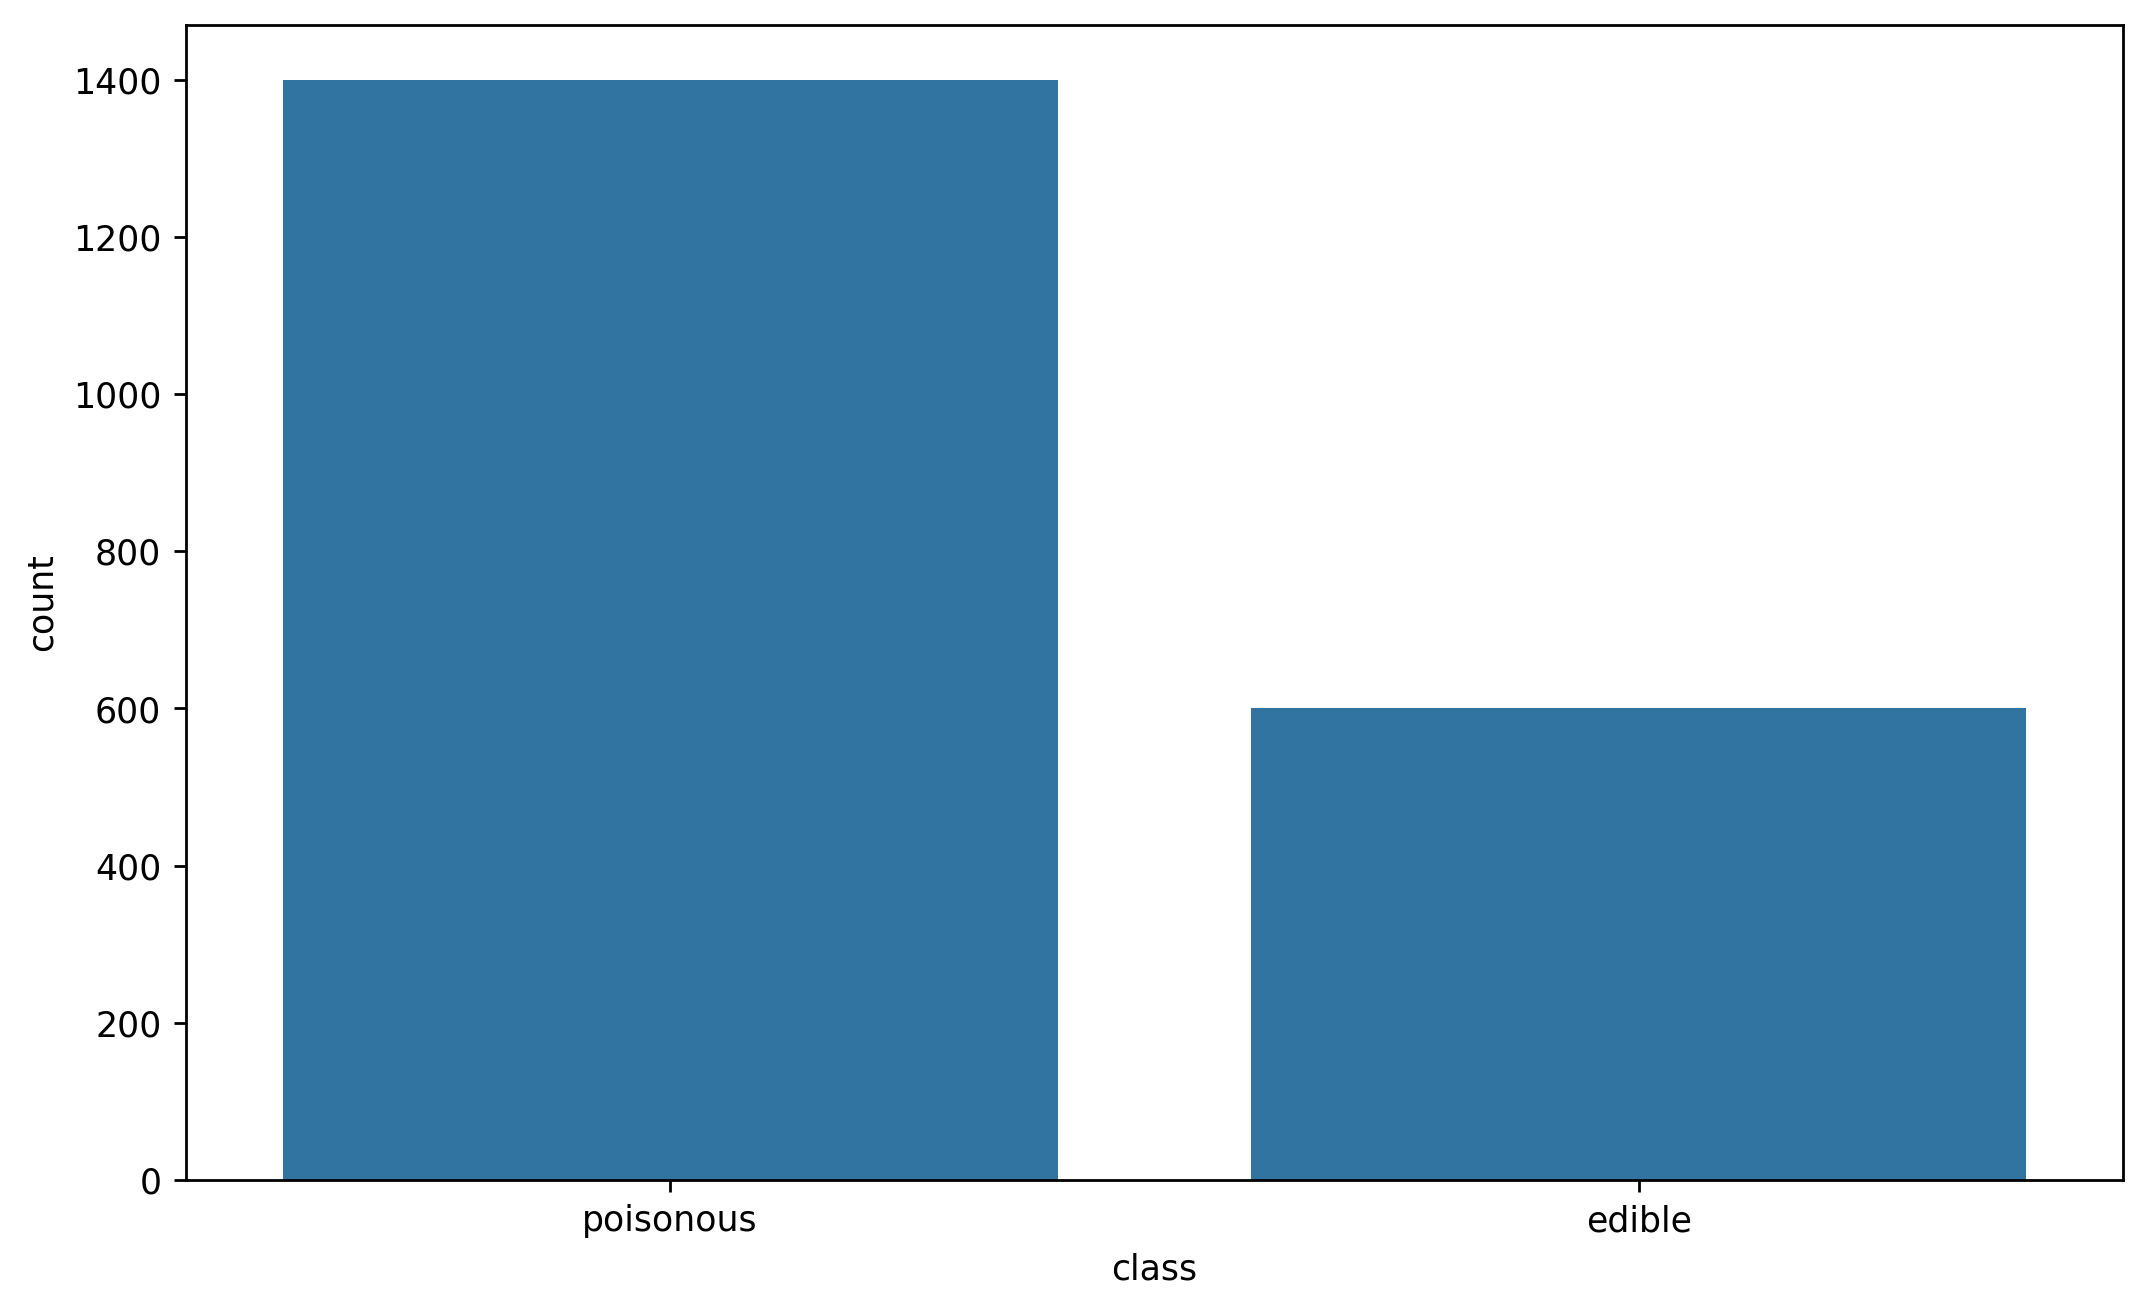

In [12]:
# count plot for the target column
sns.countplot(df, x="class")

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,624.974000,375.091938,0.0,290.000000,607.000000,957.250000,1279.000000
stalk_height,2000.0,8.449118,3.697217,2.0,5.291009,8.318596,11.781272,15.095066
cap_diameter,2000.0,12.314345,7.048845,1.0,5.723521,12.124902,18.698605,25.000054


<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

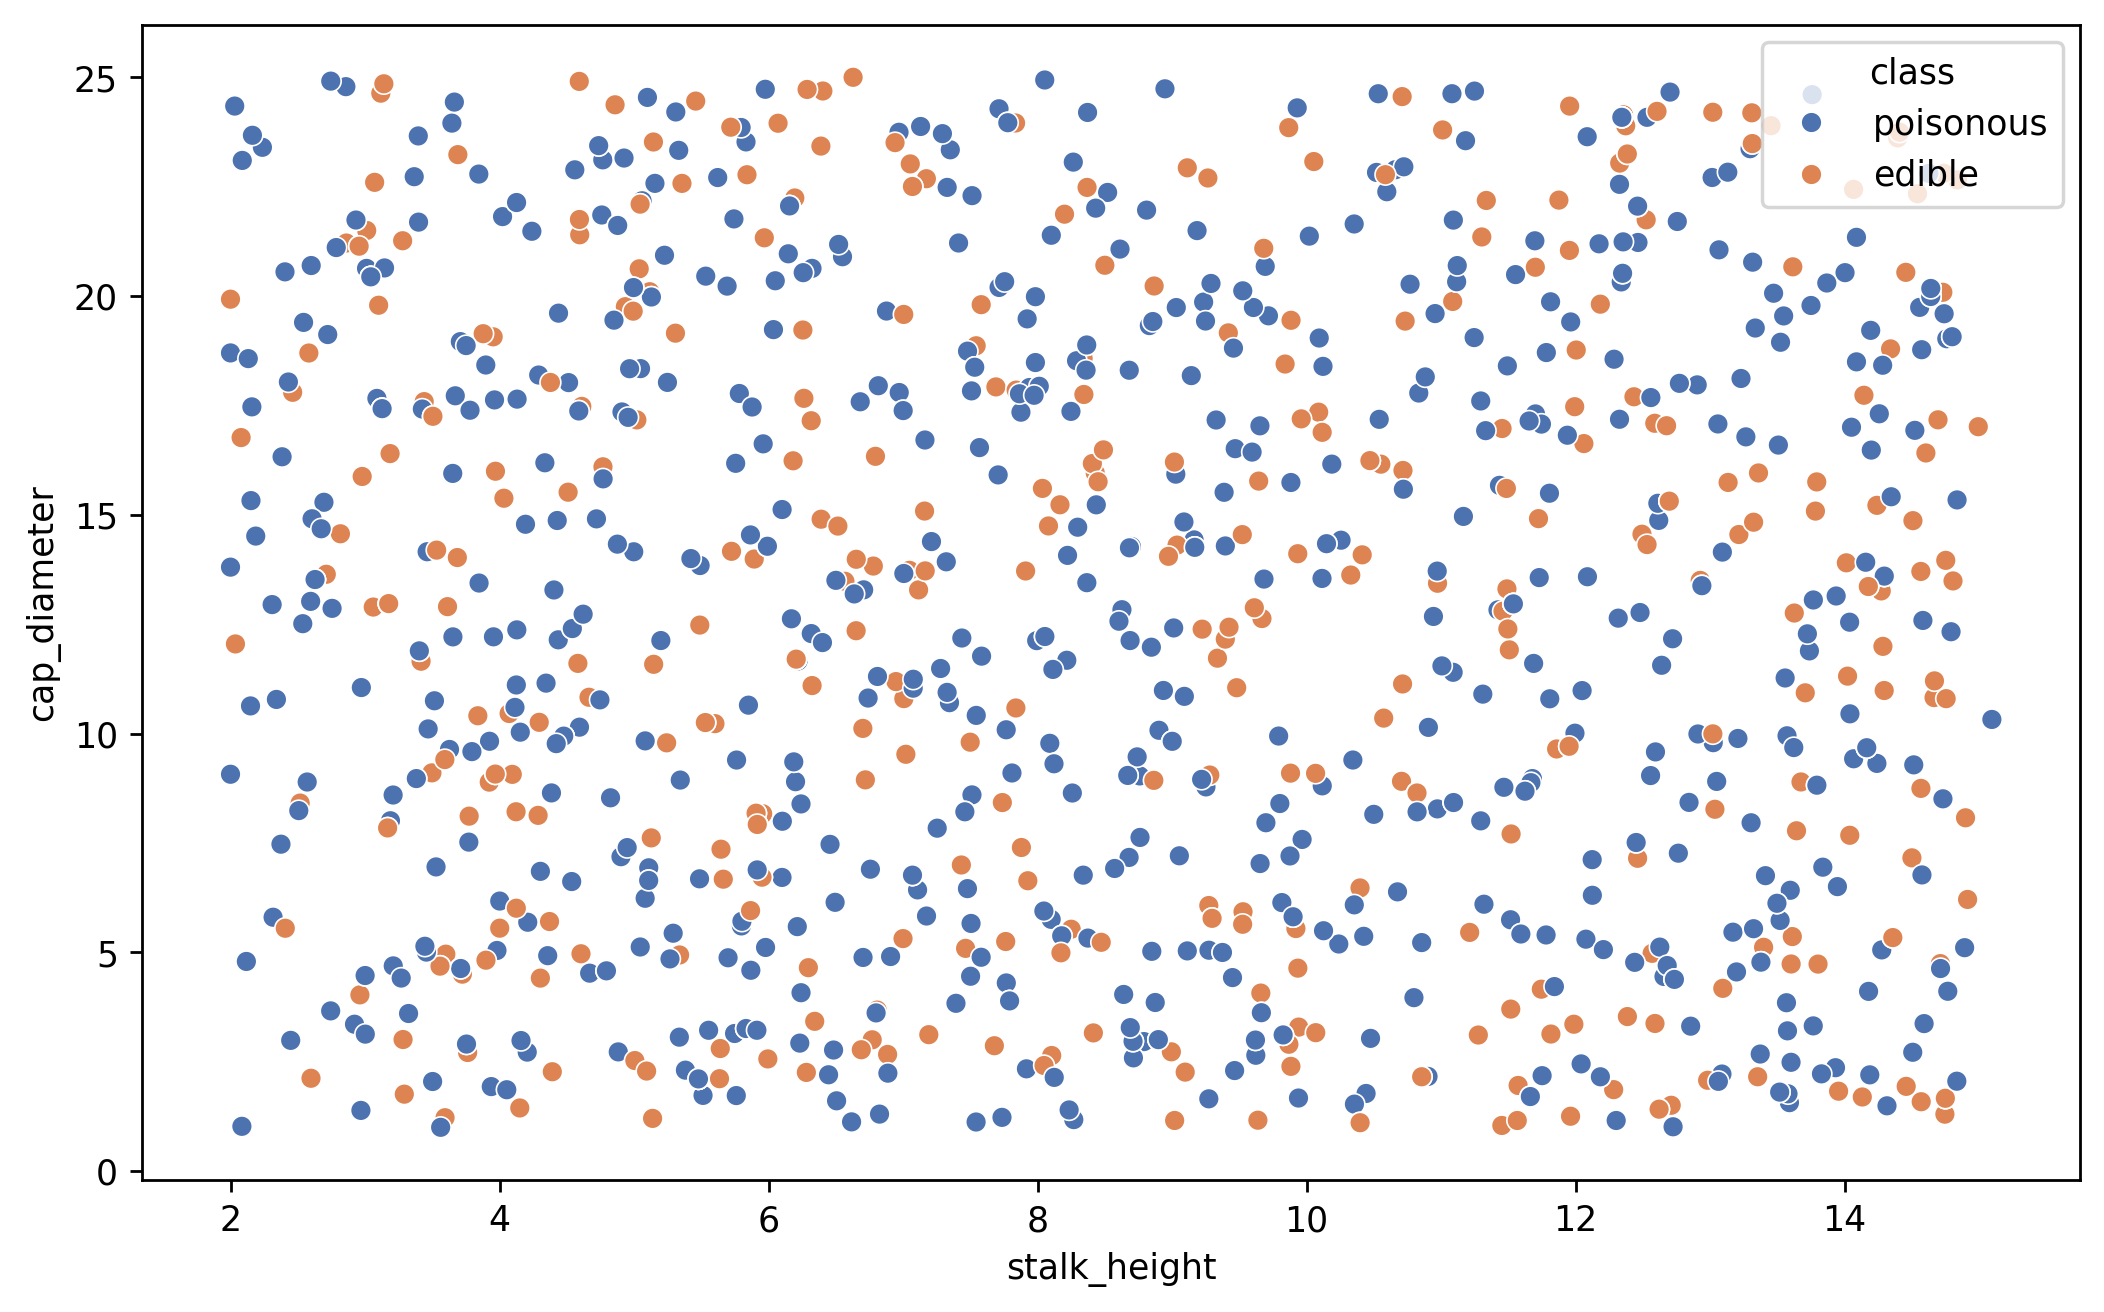

In [14]:
# just for sake of getting an idea of distribution of class plotting graph

sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class', palette='deep')

In [15]:
# I have taken some random columns just to get the idea about the distribution of the data,
# because data is present in the 25 dimensions so I can not visualize the whole dataset on one graph

In [16]:
df.shape

(2000, 26)

In [17]:
# checking for null valuess
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [18]:
# checking duplicated
df.duplicated().sum()

1024

In [19]:
# dropping duplicated
df.drop_duplicates(inplace=True)

In [20]:
# checking duplicated
df.duplicated().sum()

0

In [21]:
# checking datatypes
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [22]:
# correlation between the columns
df.corr(numeric_only=True)

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.000815,0.042726
stalk_height,0.000815,1.000000,-0.034891
cap_diameter,0.042726,-0.034891,1.000000


<Axes: >

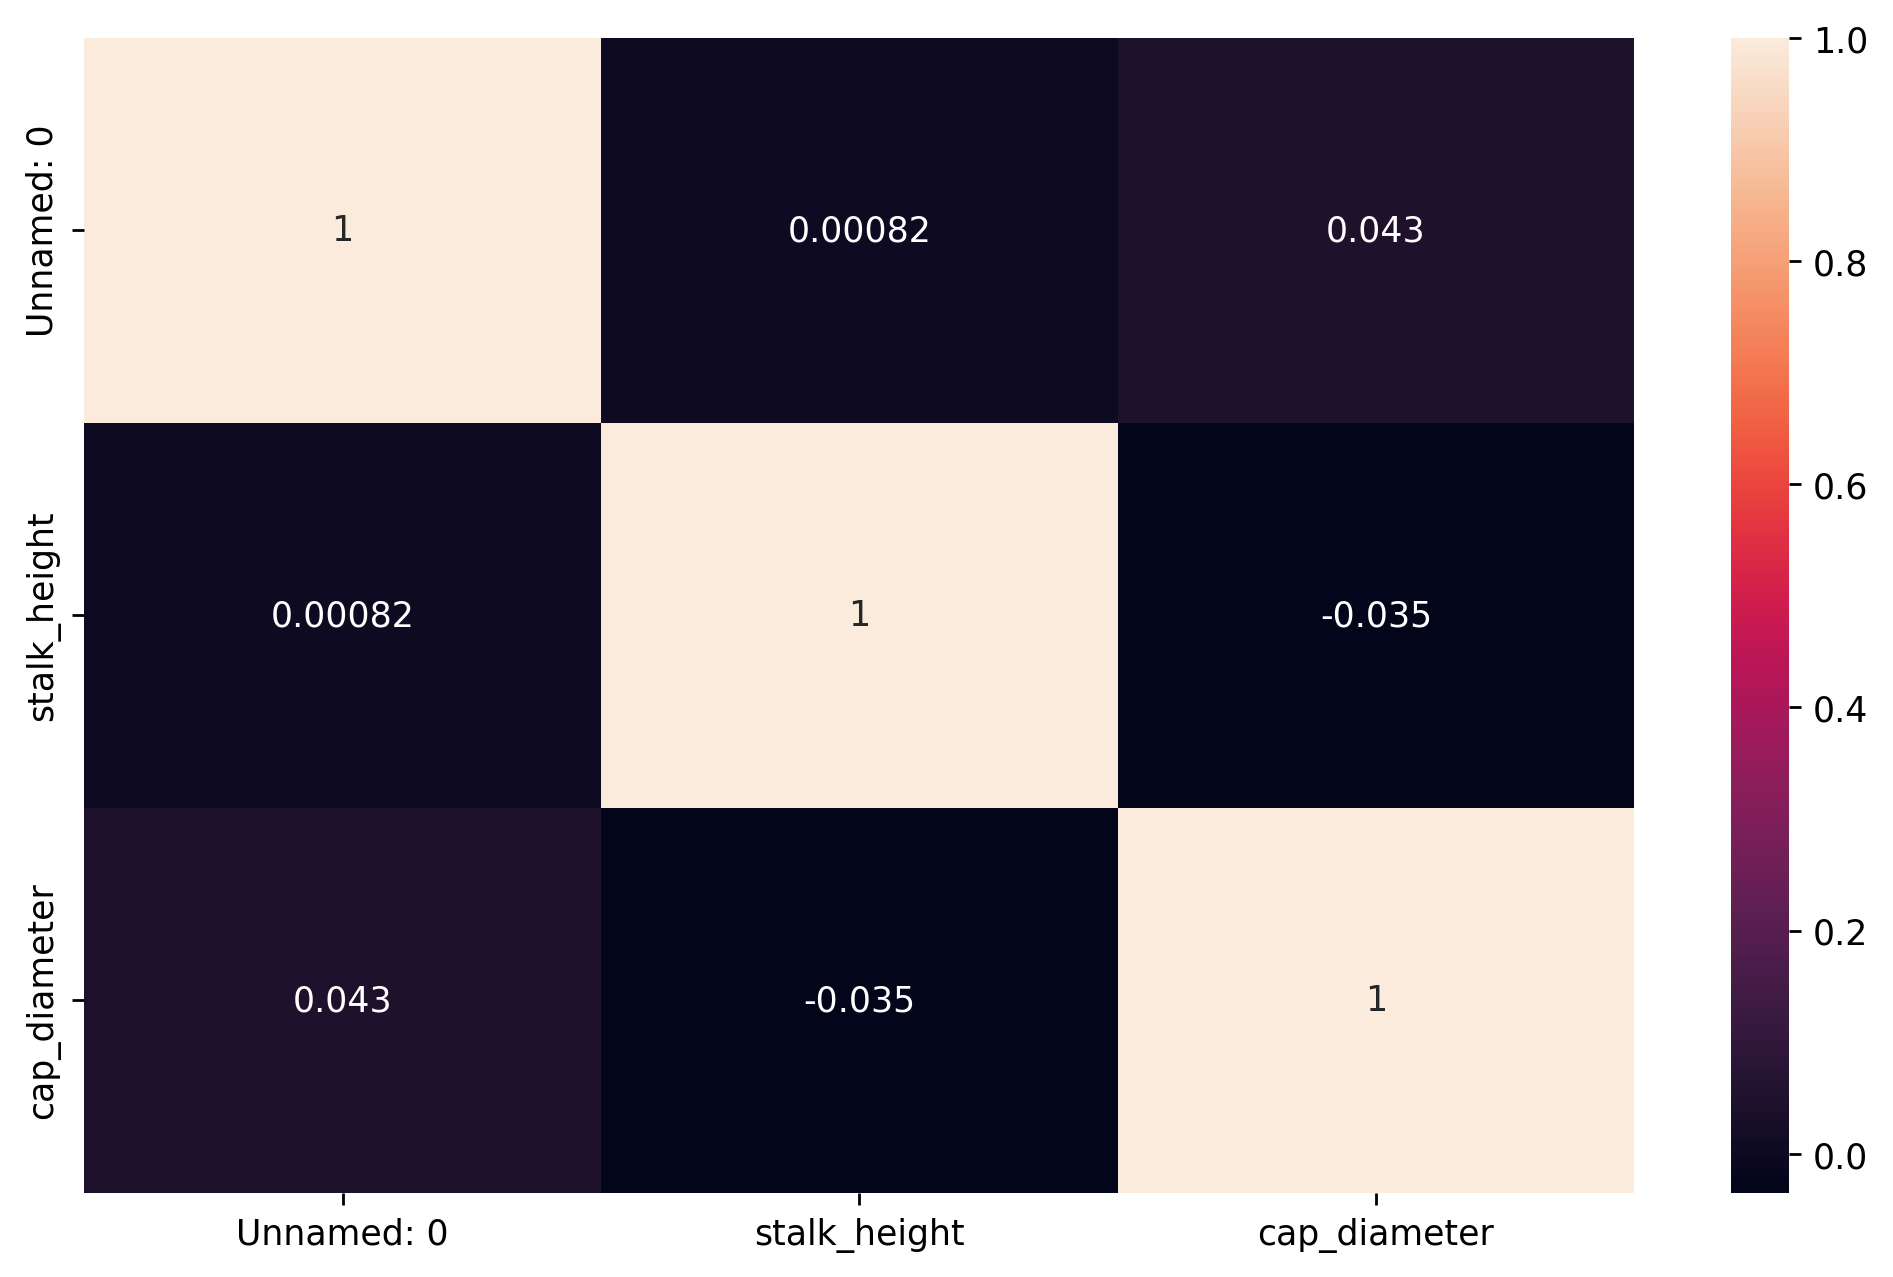

In [23]:
# heatmap for correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [24]:
# checkingn data is balanced or not
df['class'].value_counts()

class
poisonous    618
edible       358
Name: count, dtype: int64

In [25]:
# there are 2 calsses poisonous , edible       

# DATA TRANSFORMATION

### ONE HOT Encoding

In [26]:
# defining x and y
x = df.drop(columns='class')
y = df['class']

In [27]:
# list of columns that I want to encode

category_col = x.describe(include='object').columns.to_list()
category_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [28]:
df = pd.get_dummies(data=df, columns=category_col, dtype='int')
df

,Unnamed: 0,class,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1167,poisonous,14.276173,5.054983,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1037,edible,3.952715,19.068319,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,309,poisonous,9.054265,7.205884,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,282,poisonous,5.226499,20.932692,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,820,poisonous,14.037532,12.545245,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,edible,13.020616,9.993008,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1988,926,poisonous,3.751597,18.868135,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1989,289,edible,13.134058,15.740028,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1996,1160,poisonous,6.500840,13.501957,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df

,Unnamed: 0,class,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1167,poisonous,14.276173,5.054983,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1037,edible,3.952715,19.068319,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,309,poisonous,9.054265,7.205884,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,282,poisonous,5.226499,20.932692,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,820,poisonous,14.037532,12.545245,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,edible,13.020616,9.993008,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1988,926,poisonous,3.751597,18.868135,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1989,289,edible,13.134058,15.740028,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1996,1160,poisonous,6.500840,13.501957,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# FEATURE SCALLING

In [30]:
# it is mendatory to perform scalling on the dataset because
# in SVM distance calculations is incvolved

In [34]:
x = df.drop(columns='class')
y = df['class']

In [35]:
# Standardization
sc = StandardScaler()
x_scalled = sc.fit_transform(x)
x_scalled

array([[ 1.43446465,  1.55397552, -1.08020133, ..., -0.43116728,
         2.46423695, -0.40237391],
       [ 1.08507007, -1.23528506,  0.92643459, ..., -0.43116728,
         2.46423695, -0.40237391],
       [-0.87153954,  0.14308581, -0.77220366, ..., -0.43116728,
         2.46423695, -0.40237391],
       ...,
       [-0.92529255,  1.24539141,  0.44984086, ..., -0.43116728,
        -0.40580513, -0.40237391],
       [ 1.41565109, -0.54681571,  0.12936088, ..., -0.43116728,
         2.46423695, -0.40237391],
       [ 1.18182549,  1.22711479,  1.21115202, ...,  2.31928544,
        -0.40580513, -0.40237391]])

In [36]:
# see the transformation of the data
xd_scalled = pd.DataFrame(x_scalled, columns=x.columns)
xd_scalled.head()

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.434465,1.553976,-1.080201,-0.486836,-0.496475,-0.477151,-0.506076,1.875771,-0.559994,-0.528357,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,-0.42782,-0.431167,2.464237,-0.402374
1,1.085070,-1.235285,0.926435,-0.486836,-0.496475,-0.477151,-0.506076,1.875771,1.785733,-0.528357,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,-0.42782,-0.431167,2.464237,-0.402374
2,-0.871540,0.143086,-0.772204,-0.486836,-0.496475,-0.477151,1.975986,-0.533114,-0.559994,1.892659,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,-0.42782,-0.431167,2.464237,-0.402374
3,-0.944106,-0.891126,1.193403,2.054082,-0.496475,-0.477151,-0.506076,-0.533114,-0.559994,-0.528357,...,-0.442807,-0.439493,-0.431167,2.645751,-0.393738,-0.417718,-0.42782,-0.431167,-0.405805,-0.402374
4,0.501850,1.489498,-0.007635,-0.486836,-0.496475,-0.477151,1.975986,-0.533114,-0.559994,-0.528357,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,-0.42782,2.319285,-0.405805,-0.402374


# MODEL BUILDING

In [37]:
# SPLITTING DATA IN TRAINING AND TESTING PART
xtrain, xtest, ytrain, ytest = train_test_split(xd_scalled, y, test_size=0.20, random_state=42)
xtrain.head()

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
679,-0.178126,-0.505919,0.198282,-0.486836,-0.496475,2.095773,-0.506076,-0.533114,1.785733,-0.528357,...,-0.442807,-0.439493,2.319285,-0.377964,-0.393738,2.393958,-0.427820,-0.431167,-0.405805,-0.402374
625,-1.422508,0.926612,1.209262,-0.486836,-0.496475,-0.477151,-0.506076,1.875771,-0.559994,-0.528357,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,2.337429,-0.431167,-0.405805,-0.402374
33,0.176644,0.513445,-1.035732,-0.486836,2.014198,-0.477151,-0.506076,-0.533114,1.785733,-0.528357,...,-0.442807,2.275349,-0.431167,-0.377964,-0.393738,-0.417718,-0.427820,2.319285,-0.405805,-0.402374
31,-0.957544,-0.178097,0.740026,-0.486836,-0.496475,2.095773,-0.506076,-0.533114,1.785733,-0.528357,...,-0.442807,2.275349,-0.431167,-0.377964,-0.393738,-0.417718,-0.427820,2.319285,-0.405805,-0.402374
883,0.824368,-0.174208,-0.745018,-0.486836,-0.496475,-0.477151,1.975986,-0.533114,-0.559994,-0.528357,...,-0.442807,-0.439493,-0.431167,-0.377964,-0.393738,-0.417718,-0.427820,-0.431167,2.464237,-0.402374


In [38]:
# object for model class
svc = SVC(kernel='rbf')
# model trainning
svc.fit(xtrain, ytrain)
# getting prediction
ypred = svc.predict(xtest)
ypred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'pois

In [39]:
# checking performance
print(f'training accuracy: {svc.score(xtrain, ytrain)}')
print(f'training accuracy: {svc.score(xtest, ytest)}')

training accuracy: 0.8320512820512821
training accuracy: 0.6377551020408163


In [ ]:
# I am getting a overfitted model by using rbf kernel

# MODEL 2

In [ ]:
# kernel='linear'

In [40]:
# object for model class
svc = SVC(kernel='linear')
# model trainning
svc.fit(xtrain, ytrain)
# getting prediction
ypred = svc.predict(xtest)
ypred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'edible',
       'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'p

In [41]:
# checking performance
print(f'training accuracy: {svc.score(xtrain, ytrain)}')
print(f'training accuracy: {svc.score(xtest, ytest)}')

training accuracy: 0.6846153846153846
training accuracy: 0.6020408163265306


In [ ]:
# # I am getting a overfitted model by using linear kernel

#  MODEL 3

In [ ]:
# using polynomial kernel

In [42]:
# object for model class
svc = SVC(kernel='poly')
# model trainning
svc.fit(xtrain, ytrain)
# getting prediction
ypred = svc.predict(xtest)
ypred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'pois

In [43]:
# checking performance
print(f'training accuracy: {svc.score(xtrain, ytrain)}')
print(f'training accuracy: {svc.score(xtest, ytest)}')

training accuracy: 1.0
training accuracy: 0.6326530612244898


In [ ]:
# # I am getting a overfitted model by using polynomial kernel

# MODEL 4

In [ ]:
# kernel='sigmoid'

In [46]:
# object for model class
svc = SVC(kernel='sigmoid')
# model trainning
svc.fit(xtrain, ytrain)
# getting prediction
ypred = svc.predict(xtest)
ypred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'pois

In [47]:
# checking performance
print(f'training accuracy: {svc.score(xtrain, ytrain)}')
print(f'training accuracy: {svc.score(xtest, ytest)}')

training accuracy: 0.632051282051282
training accuracy: 0.6326530612244898


In [ ]:
# model is underfitted because the data is very small
# but sigmoid kernel is giving me similatr performance on both training and testing data
# that means sigmoid kernel is able to classify class very efficiently

# Practical usecases of SVM algorithm:

In [ ]:
# Text Classification: used for spam detection and sentiment analysis.

# Image Classification: applied in face recognition and object detection.

# Bioinformatics: helps in disease diagnosis and protein classification.

# Finance: used for fraud detection and credit scoring.

# Handwriting Recognition: useful in recognizing handwritten digits.